## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, num_neurons, dropout_ratio, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(dropout_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(dropout_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
DROPOUT_R = [0.2, 0.3, 0.4, 0.5, 0.6]
LAYER_NEURONS = [[512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 64]]  # neurons of each layer

In [7]:
"""Code Here
將結果繪出
"""
def plot_result(name_tag, result_dict):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Loss")
    plt.ylim([0, 5])
    plt.legend(loc = 'upper right')
    plt.show()
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Accuracy")
    plt.legend(loc = 'upper left')
    plt.show()

# Optimizer = SGD

Optimizer = SGD

neurons = [512, 256, 128]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
d

50000/50000 [==============================] - 10s 200us/step - loss: 1.2659 - accuracy: 0.5472 - val_loss: 1.3261 - val_accuracy: 0.5291
Epoch 46/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.2646 - accuracy: 0.5477 - val_loss: 1.3168 - val_accuracy: 0.5269
Epoch 47/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.2524 - accuracy: 0.5530 - val_loss: 1.2983 - val_accuracy: 0.5414
Epoch 48/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.2448 - accuracy: 0.5556 - val_loss: 1.3133 - val_accuracy: 0.5355
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.2401 - accuracy: 0.5550 - val_loss: 1.2922 - val_accuracy: 0.5369
Epoch 50/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.2367 - accuracy: 0.5553 - val_loss: 1.3001 - val_accuracy: 0.5375

neurons = [512, 256, 128]
dropout = 0.3

Model: "model_1"
_____________________________________________________

Epoch 40/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.4017 - accuracy: 0.4986 - val_loss: 1.3716 - val_accuracy: 0.5124
Epoch 41/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3984 - accuracy: 0.4995 - val_loss: 1.3550 - val_accuracy: 0.5161
Epoch 42/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.3907 - accuracy: 0.5028 - val_loss: 1.3579 - val_accuracy: 0.5176
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.3900 - accuracy: 0.5028 - val_loss: 1.3468 - val_accuracy: 0.5160
Epoch 44/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3719 - accuracy: 0.5064 - val_loss: 1.3451 - val_accuracy: 0.5200
Epoch 45/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.3709 - accuracy: 0.5109 - val_loss: 1.3458 - val_accuracy: 0.5186
Epoch 46/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.3620 - accuracy: 0.51

Epoch 35/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5469 - accuracy: 0.4482 - val_loss: 1.4432 - val_accuracy: 0.4836
Epoch 36/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5414 - accuracy: 0.4514 - val_loss: 1.4383 - val_accuracy: 0.4880
Epoch 37/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5311 - accuracy: 0.4531 - val_loss: 1.4387 - val_accuracy: 0.4850
Epoch 38/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.5310 - accuracy: 0.4538 - val_loss: 1.4366 - val_accuracy: 0.4858
Epoch 39/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5212 - accuracy: 0.4557 - val_loss: 1.4359 - val_accuracy: 0.4850
Epoch 40/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.5165 - accuracy: 0.4562 - val_loss: 1.4230 - val_accuracy: 0.4895
Epoch 41/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5090 - accuracy: 0.4606

Epoch 30/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6956 - accuracy: 0.3892 - val_loss: 1.5623 - val_accuracy: 0.4501
Epoch 31/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6882 - accuracy: 0.3951 - val_loss: 1.5526 - val_accuracy: 0.4516
Epoch 32/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6824 - accuracy: 0.3945 - val_loss: 1.5571 - val_accuracy: 0.4472
Epoch 33/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6751 - accuracy: 0.3987 - val_loss: 1.5502 - val_accuracy: 0.4497
Epoch 34/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6737 - accuracy: 0.3987 - val_loss: 1.5441 - val_accuracy: 0.4513
Epoch 35/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6681 - accuracy: 0.3983 - val_loss: 1.5353 - val_accuracy: 0.4579
Epoch 36/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6642 - accuracy: 0.40

50000/50000 [==============================] - 10s 190us/step - loss: 1.9020 - accuracy: 0.2938 - val_loss: 1.7850 - val_accuracy: 0.3550
Epoch 22/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8971 - accuracy: 0.2962 - val_loss: 1.7696 - val_accuracy: 0.3679
Epoch 23/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8873 - accuracy: 0.3022 - val_loss: 1.7785 - val_accuracy: 0.3660
Epoch 24/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8782 - accuracy: 0.3021 - val_loss: 1.7488 - val_accuracy: 0.3791
Epoch 25/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8742 - accuracy: 0.3070 - val_loss: 1.7519 - val_accuracy: 0.3722
Epoch 26/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8735 - accuracy: 0.3090 - val_loss: 1.7496 - val_accuracy: 0.3813
Epoch 27/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.8635 - accuracy: 0.3128 - val_loss

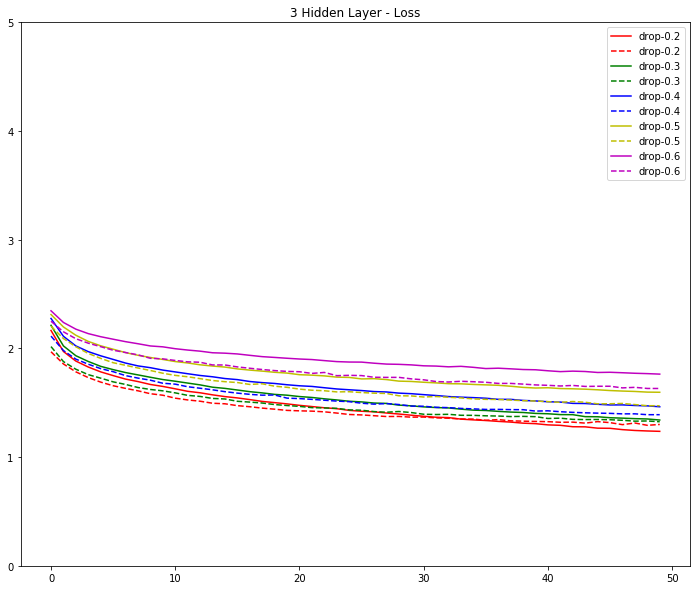

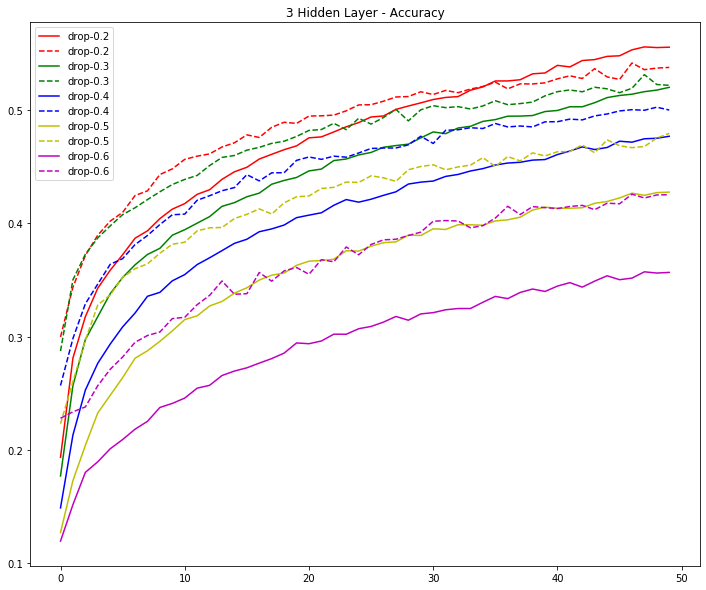


neurons = [512, 256, 128, 64]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dr

Epoch 44/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.3280 - accuracy: 0.5293 - val_loss: 1.3391 - val_accuracy: 0.5212
Epoch 45/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3167 - accuracy: 0.5305 - val_loss: 1.3306 - val_accuracy: 0.5268
Epoch 46/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3218 - accuracy: 0.5268 - val_loss: 1.3264 - val_accuracy: 0.5321
Epoch 47/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.3096 - accuracy: 0.5328 - val_loss: 1.3410 - val_accuracy: 0.5220
Epoch 48/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.3024 - accuracy: 0.5375 - val_loss: 1.3197 - val_accuracy: 0.5256
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.2938 - accuracy: 0.5366 - val_loss: 1.3237 - val_accuracy: 0.5293
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.2908 - accuracy:

Epoch 37/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5235 - accuracy: 0.4494 - val_loss: 1.4373 - val_accuracy: 0.4882
Epoch 38/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5184 - accuracy: 0.4542 - val_loss: 1.4292 - val_accuracy: 0.4892
Epoch 39/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5051 - accuracy: 0.4604 - val_loss: 1.4245 - val_accuracy: 0.4922
Epoch 40/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5013 - accuracy: 0.4636 - val_loss: 1.4188 - val_accuracy: 0.4909
Epoch 41/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4954 - accuracy: 0.4666 - val_loss: 1.4213 - val_accuracy: 0.4945
Epoch 42/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.4901 - accuracy: 0.4656 - val_loss: 1.4126 - val_accuracy: 0.4940
Epoch 43/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.4862 - accuracy:

Epoch 30/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.7019 - accuracy: 0.3813 - val_loss: 1.5714 - val_accuracy: 0.4372
Epoch 31/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6979 - accuracy: 0.3847 - val_loss: 1.5634 - val_accuracy: 0.4403
Epoch 32/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6893 - accuracy: 0.3857 - val_loss: 1.5517 - val_accuracy: 0.4481
Epoch 33/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6832 - accuracy: 0.3878 - val_loss: 1.5496 - val_accuracy: 0.4514
Epoch 34/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6768 - accuracy: 0.3900 - val_loss: 1.5473 - val_accuracy: 0.4490
Epoch 35/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6704 - accuracy: 0.3920 - val_loss: 1.5434 - val_accuracy: 0.4491
Epoch 36/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6585 - accuracy:

Epoch 23/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9163 - accuracy: 0.2727 - val_loss: 1.8264 - val_accuracy: 0.3421
Epoch 24/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.9101 - accuracy: 0.2796 - val_loss: 1.8004 - val_accuracy: 0.3373
Epoch 25/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.9068 - accuracy: 0.2826 - val_loss: 1.7916 - val_accuracy: 0.3422
Epoch 26/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8998 - accuracy: 0.2854 - val_loss: 1.7879 - val_accuracy: 0.3464
Epoch 27/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8934 - accuracy: 0.2884 - val_loss: 1.7750 - val_accuracy: 0.3535
Epoch 28/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8844 - accuracy: 0.2937 - val_loss: 1.7785 - val_accuracy: 0.3518
Epoch 29/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.8862 - accuracy:

Epoch 14/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1699 - accuracy: 0.1675 - val_loss: 2.1549 - val_accuracy: 0.1862
Epoch 15/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.1583 - accuracy: 0.1707 - val_loss: 2.1442 - val_accuracy: 0.1893
Epoch 16/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1521 - accuracy: 0.1715 - val_loss: 2.1422 - val_accuracy: 0.1907
Epoch 17/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1441 - accuracy: 0.1732 - val_loss: 2.1389 - val_accuracy: 0.1864
Epoch 18/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1394 - accuracy: 0.1762 - val_loss: 2.1335 - val_accuracy: 0.1847
Epoch 19/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1326 - accuracy: 0.1761 - val_loss: 2.1400 - val_accuracy: 0.1798
Epoch 20/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1286 - accuracy:

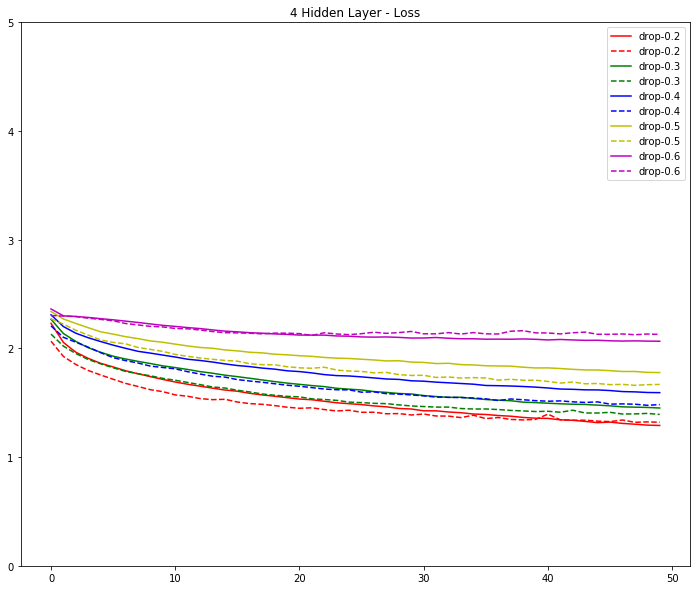

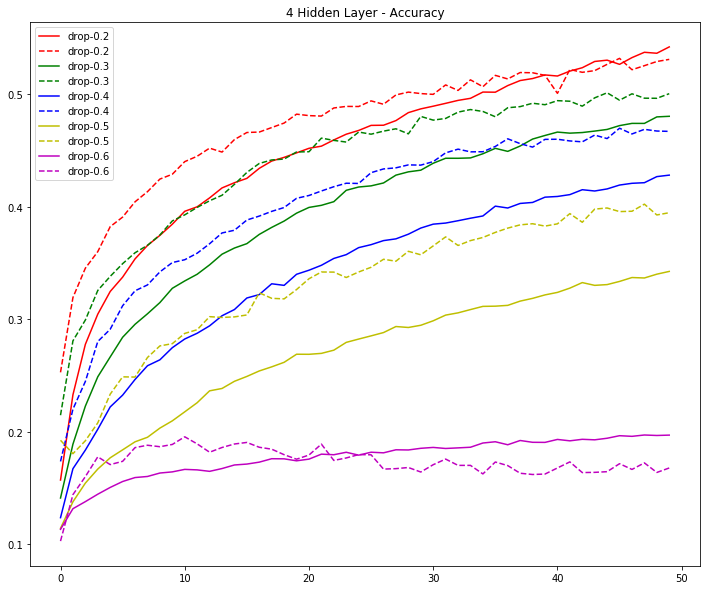


neurons = [512, 256, 128, 64, 64]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3

50000/50000 [==============================] - 10s 194us/step - loss: 1.4304 - accuracy: 0.4888 - val_loss: 1.3969 - val_accuracy: 0.5037
Epoch 43/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.4248 - accuracy: 0.4884 - val_loss: 1.3872 - val_accuracy: 0.5048
Epoch 44/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.4141 - accuracy: 0.4935 - val_loss: 1.3905 - val_accuracy: 0.4985
Epoch 45/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.4046 - accuracy: 0.4981 - val_loss: 1.3971 - val_accuracy: 0.5017
Epoch 46/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.3976 - accuracy: 0.4988 - val_loss: 1.3831 - val_accuracy: 0.5102
Epoch 47/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.3930 - accuracy: 0.5003 - val_loss: 1.3827 - val_accuracy: 0.5021
Epoch 48/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.3863 - accuracy: 0.5052 - va

50000/50000 [==============================] - 10s 196us/step - loss: 1.6488 - accuracy: 0.4007 - val_loss: 1.5258 - val_accuracy: 0.4497
Epoch 34/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.6362 - accuracy: 0.4073 - val_loss: 1.5252 - val_accuracy: 0.4495
Epoch 35/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.6333 - accuracy: 0.4045 - val_loss: 1.5219 - val_accuracy: 0.4503
Epoch 36/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.6281 - accuracy: 0.4049 - val_loss: 1.5206 - val_accuracy: 0.4553
Epoch 37/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.6228 - accuracy: 0.4101 - val_loss: 1.5179 - val_accuracy: 0.4540
Epoch 38/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.6186 - accuracy: 0.4140 - val_loss: 1.5110 - val_accuracy: 0.4587
Epoch 39/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.6115 - accuracy: 0.4124 - va

50000/50000 [==============================] - 10s 198us/step - loss: 1.8880 - accuracy: 0.2729 - val_loss: 1.8101 - val_accuracy: 0.3121
Epoch 25/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8792 - accuracy: 0.2756 - val_loss: 1.7789 - val_accuracy: 0.3194
Epoch 26/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8748 - accuracy: 0.2826 - val_loss: 1.7817 - val_accuracy: 0.3194
Epoch 27/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8685 - accuracy: 0.2813 - val_loss: 1.7755 - val_accuracy: 0.3169
Epoch 28/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.8598 - accuracy: 0.2850 - val_loss: 1.7659 - val_accuracy: 0.3272
Epoch 29/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8556 - accuracy: 0.2837 - val_loss: 1.7667 - val_accuracy: 0.3231
Epoch 30/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.8526 - accuracy: 0.2892 - va

50000/50000 [==============================] - 10s 199us/step - loss: 2.0909 - accuracy: 0.1817 - val_loss: 2.0538 - val_accuracy: 0.2097
Epoch 16/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.0846 - accuracy: 0.1841 - val_loss: 2.0502 - val_accuracy: 0.2084
Epoch 17/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.0728 - accuracy: 0.1868 - val_loss: 2.0211 - val_accuracy: 0.2233
Epoch 18/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.0634 - accuracy: 0.1910 - val_loss: 2.0258 - val_accuracy: 0.2181
Epoch 19/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.0546 - accuracy: 0.1927 - val_loss: 2.0158 - val_accuracy: 0.2205
Epoch 20/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.0479 - accuracy: 0.1945 - val_loss: 2.0250 - val_accuracy: 0.2155
Epoch 21/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.0441 - accuracy: 0.2018 - va

50000/50000 [==============================] - 12s 239us/step - loss: 2.2947 - accuracy: 0.1428 - val_loss: 2.2965 - val_accuracy: 0.1528
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.2899 - accuracy: 0.1468 - val_loss: 2.2924 - val_accuracy: 0.1541
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.2813 - accuracy: 0.1523 - val_loss: 2.2856 - val_accuracy: 0.1582
Epoch 9/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2735 - accuracy: 0.1535 - val_loss: 2.2766 - val_accuracy: 0.1595
Epoch 10/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.2621 - accuracy: 0.1568 - val_loss: 2.2622 - val_accuracy: 0.1648
Epoch 11/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2524 - accuracy: 0.1576 - val_loss: 2.2556 - val_accuracy: 0.1629
Epoch 12/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.2453 - accuracy: 0.1566 - val_l

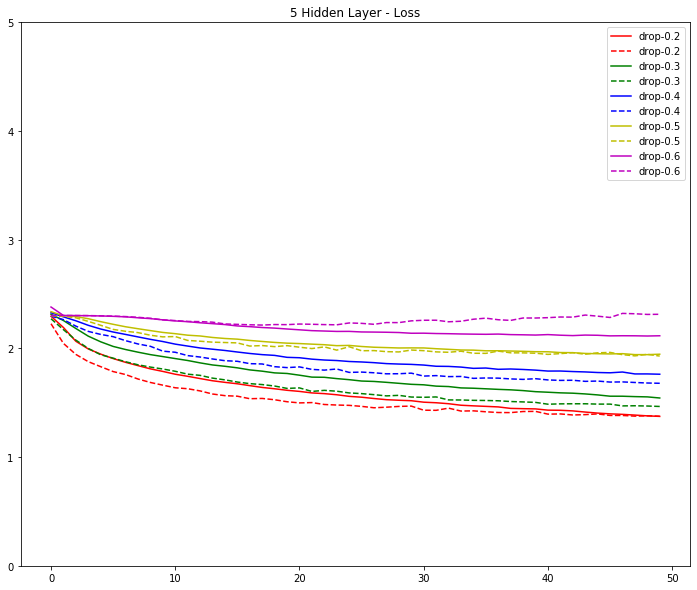

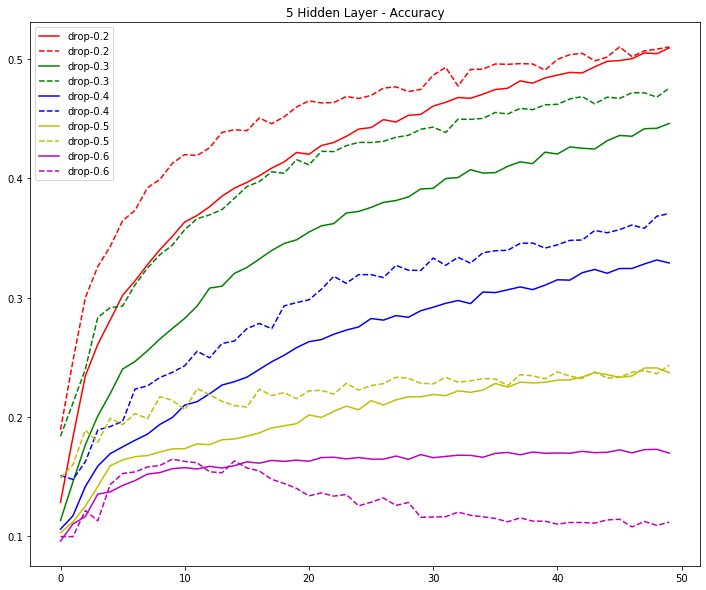

In [8]:
print("Optimizer = SGD")
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.layers import Dropout

for neurons in LAYER_NEURONS:
    results = {}
    for dropout in DROPOUT_R:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"\nneurons = {neurons}")
        print(f"dropout = {dropout}\n")
        
        # build model
        model = build_mlp(input_shape = x_train.shape[1:],
                          num_neurons = neurons,
                          dropout_ratio = dropout
                         )
        model.summary()
        
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        #exp_name_tag = "exp-reg-%s-ratio-%s" % (str(reg), str(reg_ratio))
        neurons_tag = f"{str(len(neurons))} Hidden Layer"
        dropout_tag = f"drop-{str(dropout)}"
        results[dropout_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}
        
    plot_result(name_tag = neurons_tag, result_dict = results)


# Optimizer = Adam

Optimizer = Adam

neurons = [512, 256, 128]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________


50000/50000 [==============================] - 11s 226us/step - loss: 1.4147 - accuracy: 0.4914 - val_loss: 1.3934 - val_accuracy: 0.5044
Epoch 46/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.4034 - accuracy: 0.4968 - val_loss: 1.4119 - val_accuracy: 0.4990
Epoch 47/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4055 - accuracy: 0.4970 - val_loss: 1.3948 - val_accuracy: 0.5052
Epoch 48/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4025 - accuracy: 0.4981 - val_loss: 1.3976 - val_accuracy: 0.5051
Epoch 49/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.3991 - accuracy: 0.4964 - val_loss: 1.4109 - val_accuracy: 0.4962
Epoch 50/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3977 - accuracy: 0.4946 - val_loss: 1.4013 - val_accuracy: 0.5018

neurons = [512, 256, 128]
dropout = 0.3

Model: "model_1"
_____________________________________________________

Epoch 40/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5904 - accuracy: 0.4289 - val_loss: 1.5378 - val_accuracy: 0.4568
Epoch 41/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5854 - accuracy: 0.4325 - val_loss: 1.5246 - val_accuracy: 0.4617
Epoch 42/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5900 - accuracy: 0.4269 - val_loss: 1.5215 - val_accuracy: 0.4635
Epoch 43/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5872 - accuracy: 0.4310 - val_loss: 1.5300 - val_accuracy: 0.4636
Epoch 44/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5896 - accuracy: 0.4301 - val_loss: 1.5283 - val_accuracy: 0.4572
Epoch 45/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5760 - accuracy: 0.4316 - val_loss: 1.5726 - val_accuracy: 0.4484
Epoch 46/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5821 - accuracy:

50000/50000 [==============================] - 11s 226us/step - loss: 1.7208 - accuracy: 0.3762 - val_loss: 1.7146 - val_accuracy: 0.4035
Epoch 35/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7233 - accuracy: 0.3747 - val_loss: 1.6938 - val_accuracy: 0.4202
Epoch 36/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7168 - accuracy: 0.3788 - val_loss: 1.6752 - val_accuracy: 0.4227
Epoch 37/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.7260 - accuracy: 0.3736 - val_loss: 1.7172 - val_accuracy: 0.3944
Epoch 38/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7209 - accuracy: 0.3779 - val_loss: 1.6700 - val_accuracy: 0.4156
Epoch 39/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7195 - accuracy: 0.3784 - val_loss: 1.6922 - val_accuracy: 0.4156
Epoch 40/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7111 - accuracy: 0.3793 - va

Epoch 29/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.9646 - accuracy: 0.2583 - val_loss: 2.0408 - val_accuracy: 0.2538
Epoch 30/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.9668 - accuracy: 0.2598 - val_loss: 1.9906 - val_accuracy: 0.2677
Epoch 31/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.9660 - accuracy: 0.2587 - val_loss: 1.9997 - val_accuracy: 0.2751
Epoch 32/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.9641 - accuracy: 0.2605 - val_loss: 2.0370 - val_accuracy: 0.2684
Epoch 33/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.9676 - accuracy: 0.2552 - val_loss: 2.0130 - val_accuracy: 0.2682
Epoch 34/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.9562 - accuracy: 0.2597 - val_loss: 1.9680 - val_accuracy: 0.2812
Epoch 35/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.9612 - accuracy:

50000/50000 [==============================] - 11s 221us/step - loss: 2.1342 - accuracy: 0.1772 - val_loss: 2.1035 - val_accuracy: 0.1937
Epoch 24/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.1368 - accuracy: 0.1751 - val_loss: 2.1485 - val_accuracy: 0.1870
Epoch 25/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.1361 - accuracy: 0.1788 - val_loss: 2.1369 - val_accuracy: 0.2038
Epoch 26/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.1330 - accuracy: 0.1788 - val_loss: 2.1286 - val_accuracy: 0.2049
Epoch 27/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.1341 - accuracy: 0.1780 - val_loss: 2.0916 - val_accuracy: 0.2019
Epoch 28/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.1339 - accuracy: 0.1792 - val_loss: 2.1501 - val_accuracy: 0.1945- loss: 2.1343 - accu
Epoch 29/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1317 - 

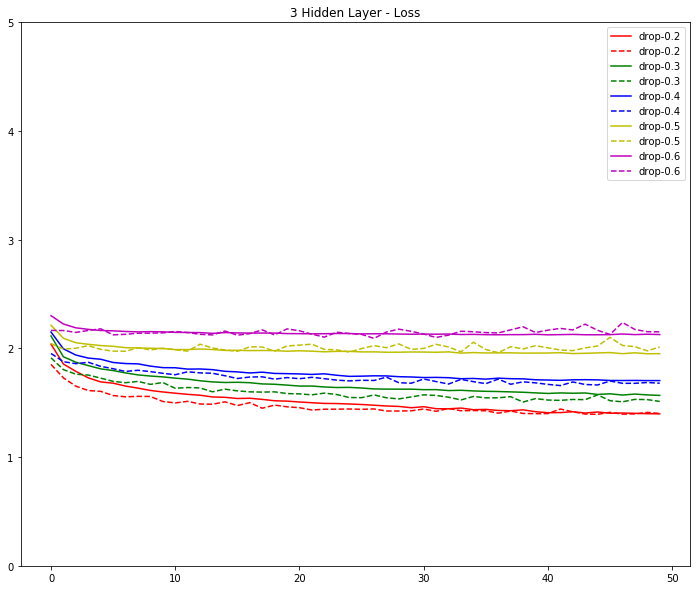

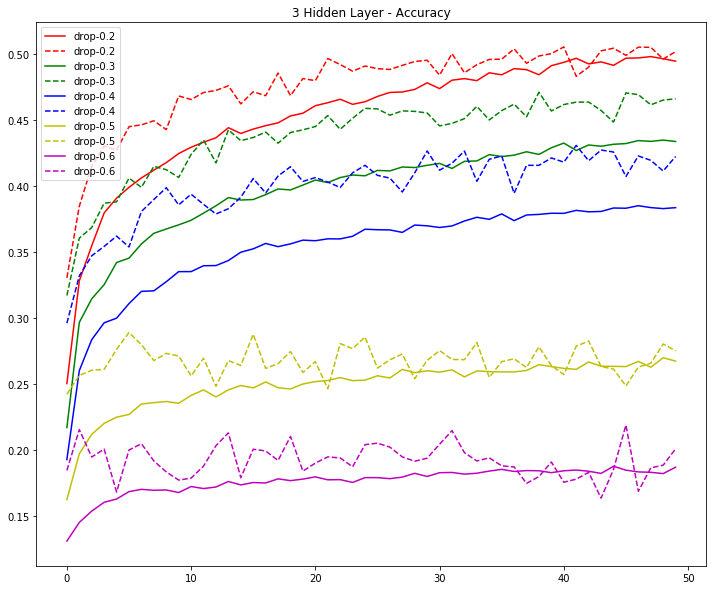


neurons = [512, 256, 128, 64]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dr

Epoch 44/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4577 - accuracy: 0.4748 - val_loss: 1.4343 - val_accuracy: 0.4923
Epoch 45/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4664 - accuracy: 0.4764 - val_loss: 1.4257 - val_accuracy: 0.4931
Epoch 46/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4564 - accuracy: 0.4793 - val_loss: 1.4189 - val_accuracy: 0.4948
Epoch 47/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.4558 - accuracy: 0.4797 - val_loss: 1.4199 - val_accuracy: 0.4941
Epoch 48/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4465 - accuracy: 0.4807 - val_loss: 1.4281 - val_accuracy: 0.4871
Epoch 49/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4426 - accuracy: 0.4809 - val_loss: 1.4226 - val_accuracy: 0.4967
Epoch 50/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4480 - accuracy:

Epoch 37/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.6849 - accuracy: 0.3931 - val_loss: 1.6271 - val_accuracy: 0.4314
Epoch 38/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6806 - accuracy: 0.3947 - val_loss: 1.6128 - val_accuracy: 0.4379
Epoch 39/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6768 - accuracy: 0.3938 - val_loss: 1.6056 - val_accuracy: 0.4255
Epoch 40/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.6805 - accuracy: 0.3925 - val_loss: 1.6228 - val_accuracy: 0.4337
Epoch 41/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6756 - accuracy: 0.3961 - val_loss: 1.6265 - val_accuracy: 0.4278
Epoch 42/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.6761 - accuracy: 0.3950 - val_loss: 1.6325 - val_accuracy: 0.4222
Epoch 43/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6698 - accuracy:

Epoch 30/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.8702 - accuracy: 0.2994 - val_loss: 1.8309 - val_accuracy: 0.3406
Epoch 31/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.8690 - accuracy: 0.3024 - val_loss: 1.8812 - val_accuracy: 0.3183
Epoch 32/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.8629 - accuracy: 0.3023 - val_loss: 1.8393 - val_accuracy: 0.3372
Epoch 33/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.8612 - accuracy: 0.3038 - val_loss: 1.8163 - val_accuracy: 0.3406
Epoch 34/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8600 - accuracy: 0.3042 - val_loss: 1.8241 - val_accuracy: 0.3332
Epoch 35/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.8498 - accuracy: 0.3062 - val_loss: 1.8798 - val_accuracy: 0.3065
Epoch 36/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.8549 - accuracy:

50000/50000 [==============================] - 11s 229us/step - loss: 2.0638 - accuracy: 0.2052 - val_loss: 2.0421 - val_accuracy: 0.2224
Epoch 23/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.0632 - accuracy: 0.2070 - val_loss: 2.0560 - val_accuracy: 0.2295
Epoch 24/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.0578 - accuracy: 0.2060 - val_loss: 2.0818 - val_accuracy: 0.2282
Epoch 25/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.0524 - accuracy: 0.2107 - val_loss: 2.0440 - val_accuracy: 0.2297
Epoch 26/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.0570 - accuracy: 0.2091 - val_loss: 2.0587 - val_accuracy: 0.2171
Epoch 27/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.0464 - accuracy: 0.2135 - val_loss: 2.0637 - val_accuracy: 0.2244
Epoch 28/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.0522 - accuracy: 0.2138 - va

Epoch 15/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3027 - accuracy:

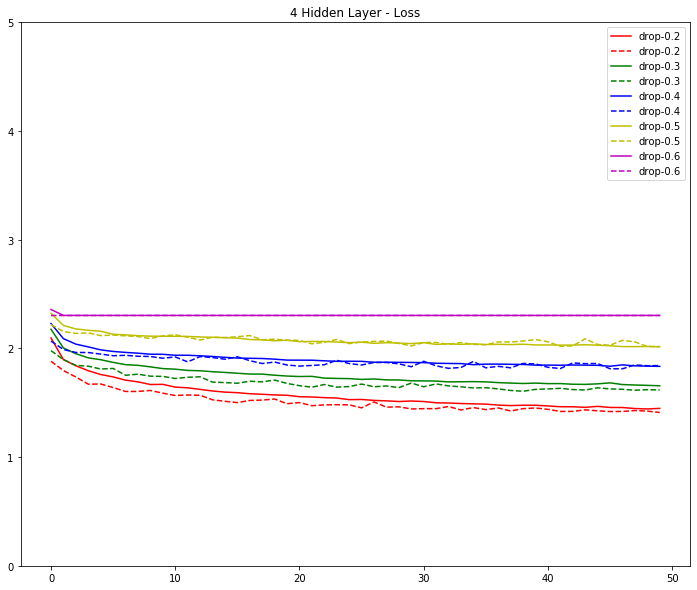

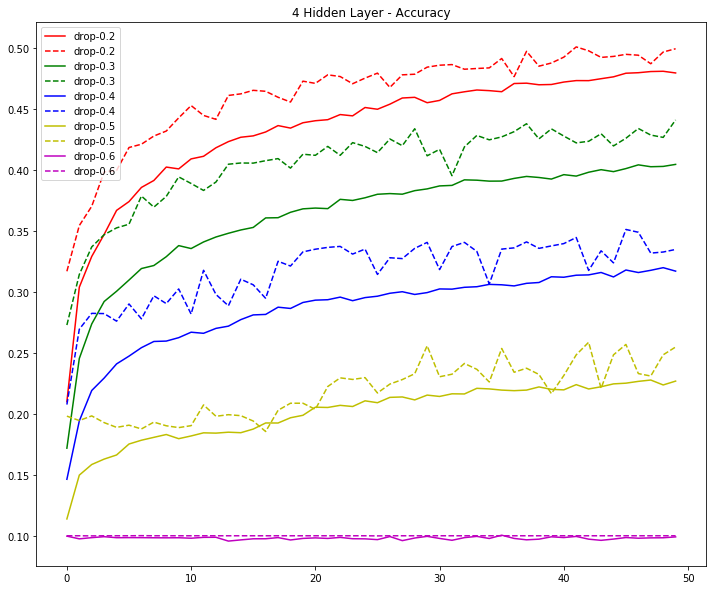


neurons = [512, 256, 128, 64, 64]
dropout = 0.2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3

50000/50000 [==============================] - 11s 230us/step - loss: 1.5747 - accuracy: 0.4378 - val_loss: 1.5260 - val_accuracy: 0.4601
Epoch 43/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5716 - accuracy: 0.4376 - val_loss: 1.5204 - val_accuracy: 0.4576
Epoch 44/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.5654 - accuracy: 0.4399 - val_loss: 1.5098 - val_accuracy: 0.4705
Epoch 45/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.5659 - accuracy: 0.4384 - val_loss: 1.5120 - val_accuracy: 0.4602
Epoch 46/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5670 - accuracy: 0.4416 - val_loss: 1.5341 - val_accuracy: 0.4584
Epoch 47/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5612 - accuracy: 0.4428 - val_loss: 1.4984 - val_accuracy: 0.4711
Epoch 48/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5592 - accuracy: 0.4458 - va

50000/50000 [==============================] - 12s 231us/step - loss: 1.7817 - accuracy: 0.3446 - val_loss: 1.7550 - val_accuracy: 0.3775
Epoch 34/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.7852 - accuracy: 0.3428 - val_loss: 1.7565 - val_accuracy: 0.3653
Epoch 35/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.7769 - accuracy: 0.3448 - val_loss: 1.7168 - val_accuracy: 0.3865
Epoch 36/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7799 - accuracy: 0.3468 - val_loss: 1.7702 - val_accuracy: 0.3748
Epoch 37/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7801 - accuracy: 0.3485 - val_loss: 1.7360 - val_accuracy: 0.3858
Epoch 38/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.7769 - accuracy: 0.3497 - val_loss: 1.7326 - val_accuracy: 0.3729
Epoch 39/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7698 - accuracy: 0.3530 - va

50000/50000 [==============================] - 12s 232us/step - loss: 1.9976 - accuracy: 0.2409 - val_loss: 1.9829 - val_accuracy: 0.2596
Epoch 25/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9927 - accuracy: 0.2431 - val_loss: 2.0645 - val_accuracy: 0.2230
Epoch 26/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.9919 - accuracy: 0.2434 - val_loss: 1.9587 - val_accuracy: 0.2782
Epoch 27/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9980 - accuracy: 0.2429 - val_loss: 2.0042 - val_accuracy: 0.2504
Epoch 28/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9875 - accuracy: 0.2448 - val_loss: 2.0267 - val_accuracy: 0.2503
Epoch 29/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.9946 - accuracy: 0.2406 - val_loss: 2.0272 - val_accuracy: 0.2487
Epoch 30/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.9891 - accuracy: 0.2441 - va

50000/50000 [==============================] - 12s 231us/step - loss: 2.1035 - accuracy: 0.1831 - val_loss: 2.1707 - val_accuracy: 0.1618
Epoch 16/50
50000/50000 [==============================] - 11s 230us/step - loss: 2.1084 - accuracy: 0.1785 - val_loss: 2.1785 - val_accuracy: 0.1585
Epoch 17/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.1018 - accuracy: 0.1820 - val_loss: 2.1865 - val_accuracy: 0.1540
Epoch 18/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.0985 - accuracy: 0.1838 - val_loss: 2.1479 - val_accuracy: 0.1672
Epoch 19/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.0982 - accuracy: 0.1841 - val_loss: 2.2000 - val_accuracy: 0.1528
Epoch 20/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.0936 - accuracy: 0.1863 - val_loss: 2.1918 - val_accuracy: 0.1484
Epoch 21/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.0915 - accuracy: 0.1904 - va

50000/50000 [==============================] - 12s 231us/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 12/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3027 - accuracy: 0.0968 - val_l

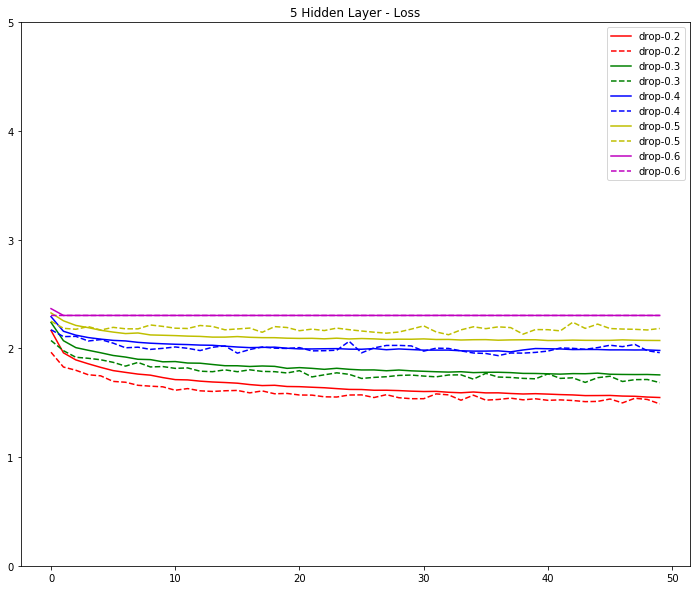

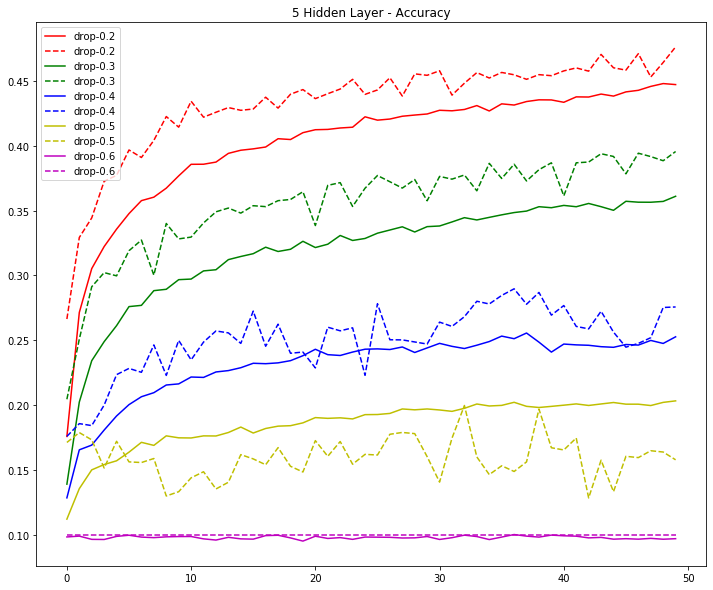

In [9]:
print("Optimizer = Adam")
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.layers import Dropout

for neurons in LAYER_NEURONS:
    results = {}
    for dropout in DROPOUT_R:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"\nneurons = {neurons}")
        print(f"dropout = {dropout}\n")
        
        # build model
        model = build_mlp(input_shape = x_train.shape[1:],
                          num_neurons = neurons,
                          dropout_ratio = dropout
                         )
        model.summary()
        
        optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        #exp_name_tag = "exp-reg-%s-ratio-%s" % (str(reg), str(reg_ratio))
        neurons_tag = f"{str(len(neurons))} Hidden Layer"
        dropout_tag = f"drop-{str(dropout)}"
        results[dropout_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}
        
    plot_result(name_tag = neurons_tag, result_dict = results)
